# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Loading the dataset

In [2]:
df = pd.read_csv(r"C:\Users\sayed\OneDrive\Desktop\Datasets\Churn_Modelling.csv")

In [3]:
df.head

<bound method NDFrame.head of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfPro

# 1-Exploratory Data Analysis (EDA)

In [4]:
df.shape

(10000, 14)

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Importing essential libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

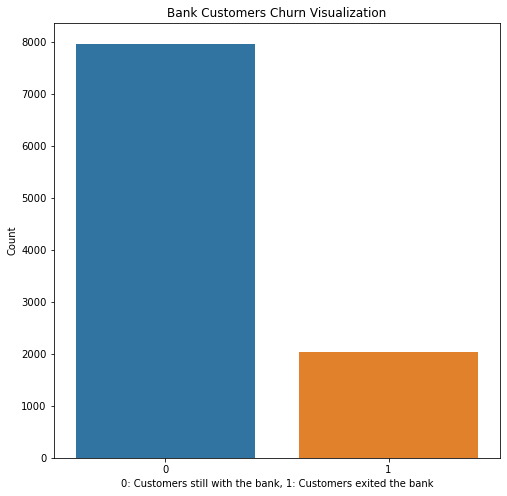

In [9]:
# Visualizing the count of 'exited customers' in the dataset
plt.figure(figsize=(8,8))
sns.countplot(x='Exited', data=df)
plt.xlabel('0: Customers still with the bank, 1: Customers exited the bank')
plt.ylabel('Count')
plt.title('Bank Customers Churn Visualization')
plt.show()

In [10]:
df.isna().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [11]:
df.drop(['RowNumber','CustomerId','Surname'], axis=1, inplace=True)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

# 2- Feature Engineering

Converting categorical features into numerical features using get_dummies()

In [12]:
# Converting 'Geography' and 'Gender' column
geography = pd.get_dummies(df['Geography'], drop_first=True)
gender = pd.get_dummies(df['Gender'], drop_first=True)

In [13]:
# Appending columns to original dataframe
df = pd.concat([df, geography, gender], axis=1)
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [14]:
df.drop(['Geography', 'Gender'], axis=1, inplace=True)

# 3- Data Preprocessing

Split the dataset into independent features (ie: X) and label (ie: y).

• Split the dataset further into train and test sets.

• Apply feature scaling to train and test sets of independent features.

In [15]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [16]:
# Splitting the dataset into train and test sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
print('X_train size: {}, X_test size: {}'.format(X_train.shape, X_test.shape))

X_train size: (8000, 11), X_test size: (2000, 11)


In [17]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4- Building Artificial Neural Network (ANN)

In [18]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [20]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [21]:
# Initialising the ANN
classifier = Sequential()

In [22]:
# Adding the second hidden layer
classifier.add(Dense(units=6, kernel_initializer='he_uniform', activation='relu'))

In [23]:
# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))

In [24]:
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Fitting the ANN to the Training set
model_history = classifier.fit(X_train, y_train, batch_size=10, validation_split=0.33, epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 3ms/step - loss: 0.6545 - accuracy: 0.6494 - val_loss: 0.5444 - val_accuracy: 0.7834
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4877 - accuracy: 0.7979 - val_loss: 0.4658 - val_accuracy: 0.8035
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.8095 - val_loss: 0.4454 - val_accuracy: 0.8095
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4265 - accuracy: 0.8141 - val_loss: 0.4383 - val_accuracy: 0.8129
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4201 - accuracy: 0.8196 - val_loss: 0.4340 - val_accuracy: 0.8129
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4162 - accuracy: 0.8201 - val_loss: 0.4308 - val_accuracy: 0.8126
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4126 - accuracy: 0.8225 - val_loss: 0.4264 - val_accuracy: 0.8160

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8614 - val_loss: 0.3621 - val_accuracy: 0.8504
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8625 - val_loss: 0.3617 - val_accuracy: 0.8485
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8623 - val_loss: 0.3623 - val_accuracy: 0.8485
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8614 - val_loss: 0.3620 - val_accuracy: 0.8519
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3363 - accuracy: 0.8619 - val_loss: 0.3618 - val_accuracy: 0.8527
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8625 - val_loss: 0.3620 - val_accuracy: 0.8531
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3362 - accuracy: 0.8615 - val_loss: 0.3626 - val_accuracy:

In [26]:
# List all data in history
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

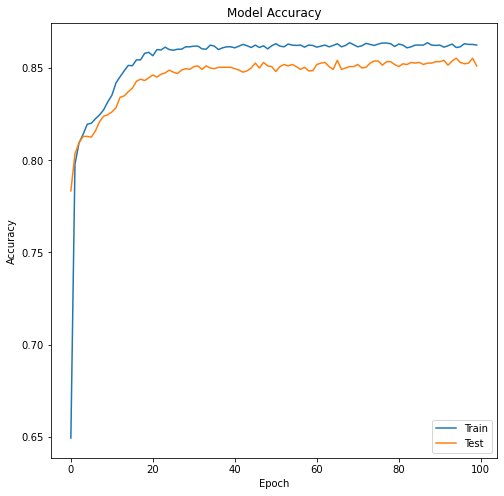

In [27]:
# Summarize history for accuracy
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

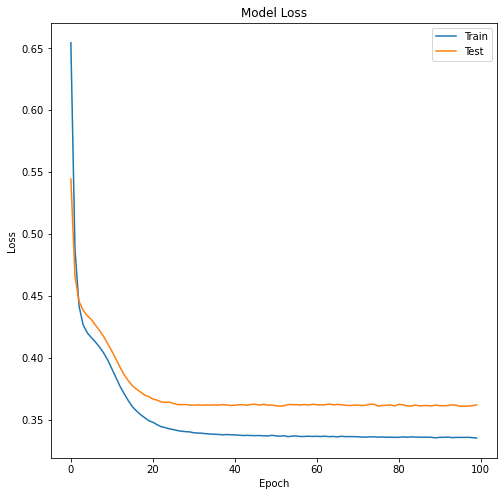

In [28]:
# Summarize history for loss
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

# 5- Model Evaluation

In [29]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [30]:
y_pred

array([[0.2647454 ],
       [0.35133877],
       [0.11021733],
       ...,
       [0.22077182],
       [0.19220471],
       [0.22588104]], dtype=float32)

In [31]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

# Confusion Matrix

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1526,   69],
       [ 212,  193]], dtype=int64)

Total correct predictions that customers stay in bank = 1514

• Total correct predictions that customers leave the bank = 202

• Total incorrect predictions that customers stay in the bank = 203

• Total incorrect predictions that customers leave in the bank = 81

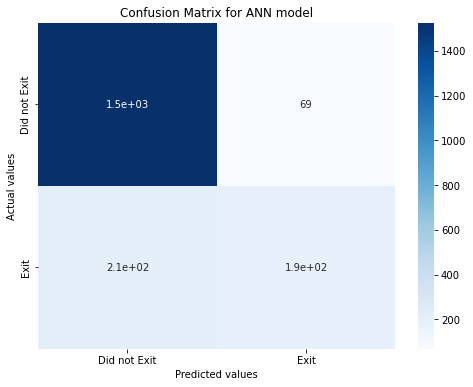

In [33]:
# Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues', annot=True, xticklabels=['Did not Exit', 'Exit'], yticklabels=['Did not Exit', 'Exit'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for ANN model')
plt.show()

# Accuracy

In [34]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)
print('The accuracy for ANN model is: {}%'.format(score*100))

The accuracy for ANN model is: 85.95%


Results - 86% Accuracy achieved.

# 6- Predictions

In [35]:
def predict_exit(sample_value):
  
  # Convert list to numpy array
  sample_value = np.array(sample_value)

  # Reshape because sample_value contains only 1 record
  sample_value = sample_value.reshape(1, -1)

  # Feature Scaling
  sample_value = sc.transform(sample_value)

  return classifier.predict(sample_value)

In [36]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [738, 62, 10, 83008.31, 1, 1, 1, 42766.03, 1, 0, 1]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 16ms/step
Prediction: Low change of exit.


In [37]:
# Predictions
# Value order 'CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Germany','Spain','Male'.
sample_value = [805, 45, 9, 116585.97, 1, 1, 0, 189428.75, 1, 0, 0]
if predict_exit(sample_value)>0.5:
  print('Prediction: High change of exit!')
else:
  print('Prediction: Low change of exit.')

1/1 [==============================] - 0s 16ms/step
Prediction: High change of exit!
